<a href="https://colab.research.google.com/github/patriclockhart/DataVizFall2020_Colab/blob/master/Copy_of_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial data manipulation
## Geopandas

"Geopandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting."https://geopandas.org/


In [ ]:
pip install geopandas;

In [ ]:
import pandas as pd
import geopandas as gpd
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from descartes import PolygonPatch


## Load shape file for the us counties from US CENSUS data website:

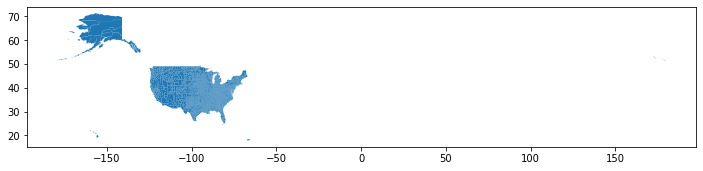

In [ ]:
df_counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_20m.zip")
df_counties.plot(figsize=(12,10))

## EPSG (1024-32767)
https://support.esri.com/en/technical-article/000002814#:~:text=Answer,version%20of%20the%20EPSG%20model.
https://epsg.org/home.html
https://source.opennews.org/articles/choosing-right-map-projection/

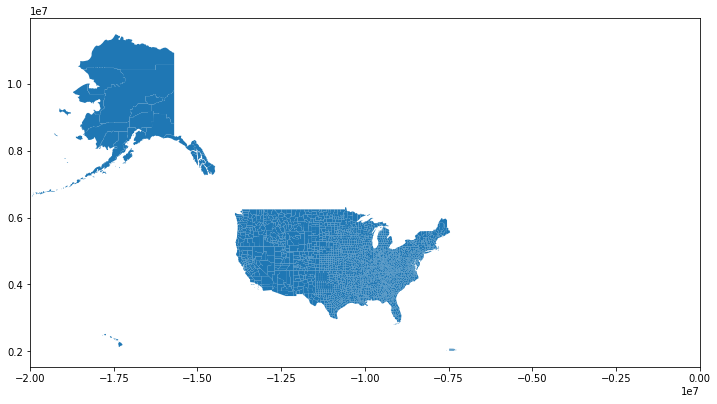

In [ ]:
f,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_xlim([-2e7,-7e-6])
df_counties.to_crs(epsg=3395).plot(ax=ax)

In [ ]:
## let us see data

In [ ]:
df_counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."


In [ ]:
## loading us election data from NYT

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/favstats/USElection2020-NYT-Results/master/data/latest/presidential.csv")

In [ ]:
## make sure the FIPS field has 5 digits size FIPS values

In [ ]:
def FiveDigit(x):
    if len(x)<4:
        return '00'+ str(x)
    elif len(x)<5:
        return '0'+ str(x)
    else:
        return x
data['FIPS'] = data['fips'].astype("str")
data['FIPS'] = data['FIPS'].apply(FiveDigit)
data.set_index('FIPS',inplace=True)

In [ ]:
## define winnder using 1 line if statement <expression1> if <condition> else <expression2>
data['winner'] = (data['results_trumpd']-data['results_bidenj']).apply(lambda x: 'Biden' if x<0 else 'Trump')

In [ ]:
## join data with counties using GEOID and FIPS

In [ ]:
df_counties_data = df_counties.join(data[['state','votes','results_trumpd','results_bidenj','winner']],on='GEOID',rsuffix='_').sort_values("GEOID")
df_counties_data = df_counties_data.dropna()

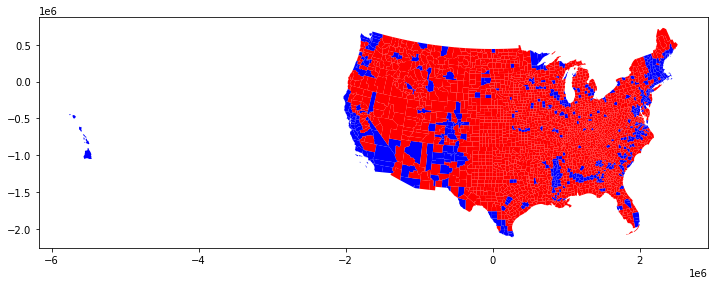

In [ ]:
## https://source.opennews.org/articles/choosing-right-map-projection/ 
f,ax = plt.subplots(1,1,figsize=(12,7))
#ax.set_xlim([(-1.5e7),(-.7e-7)])
df_counties_data.to_crs(epsg=2163).plot(ax=ax,column='winner',cmap='bwr')

In [ ]:
df_counties_data.to_file("counties.json", driver="GeoJSON")